In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import keras

from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
df = pd.read_csv("datasets/ANAD_Normalized.csv")

In [3]:
df.shape

(1383, 847)

In [4]:
df.head()

,name,Emotion,Type,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,V2_1 (1).wav',surprised,2,0.285714,0,0.285714,0.414894,0.0,0,0,...,0.092117,0.294281,0.771490,0.589508,0.117983,0.017167,0.027963,0.013516,0.067167,2.028063
1,V2_1 (2).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.031789,0.203679,0.565664,0.335376,0.120382,0.027347,0.045084,0.044086,0.085771,3.003057
2,V2_1 (3).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.097341,0.341096,0.657804,0.451624,0.107132,0.017167,0.028058,0.054392,0.067393,2.663894
3,V2_1 (4).wav',surprised,2,0.285714,0,0.285714,0.404255,0.0,0,0,...,0.055432,0.245241,0.516015,0.350308,0.121571,0.020762,0.048233,0.013987,0.107900,3.138976
4,V2_1 (5).wav',surprised,2,0.142857,0,0.142857,0.606383,0.0,0,0,...,0.033673,0.199890,0.519454,0.265627,0.119747,0.022636,0.045822,0.028148,0.097964,3.087905


In [5]:
df['Emotion '].unique()

array(['surprised', 'angry', 'happy'], dtype=object)

In [57]:
df['Emotion '].value_counts()/df['Emotion '].shape*100

angry        53.579176
happy        36.514823
surprised     9.906001
Name: Emotion , dtype: float64

In [7]:
df.drop('Type', 1, inplace = True)

In [8]:
X = df.drop(['name', 'Emotion '], axis = 1) 
y = df['Emotion ']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)


In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
print((X_train.shape[0], X_test.shape[0]))

(968, 415)


In [12]:
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 844


# Multi Layer Perceptron Classifier

In [13]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), 
                    learning_rate='adaptive', max_iter = 500)

In [14]:
classifier.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
#y_pred

In [17]:
#Calculating the accuracy of our model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)

In [18]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 95.90%


In [19]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_true = y_train, y_pred = y_pred)


In [20]:
print(accuracy)

1.0


# Changing dimension for CNN model

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [22]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [23]:
variables_for_classification=3

In [24]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))###################################
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(variables_for_classification))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [27]:
################# NEW MODEL ###################
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(BatchNormalization())
model.add(Conv1D(128, 8, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.20))

model.add(Conv1D(64, 8, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization())
model.add(Conv1D(64, 8, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(BatchNormalization())       
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.30))

# model.add(Conv1D(265, 8, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(Conv1D(128, 8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))      
# model.add(BatchNormalization())       
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.30))


model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.20))


model.add(Dense(3, activation='softmax'))

adam = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 844, 256)          1536      
_________________________________________________________________
batch_normalization_2 (Batch (None, 844, 256)          1024      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 837, 128)          262272    
_________________________________________________________________
batch_normalization_3 (Batch (None, 837, 128)          512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 418, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 418, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 411, 64)          

In [29]:
# Compile your model

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [30]:
from keras.callbacks import ReduceLROnPlateau

In [31]:

# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.0001)
mcp_save = ModelCheckpoint('model/Ar_model_CNN_2.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=350,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce, es])

Train on 968 samples, validate on 415 samples
Epoch 1/350
968/968 [==============================] - 29s 30ms/step - loss: 56.7922 - accuracy: 0.7717 - val_loss: 55.2331 - val_accuracy: 0.3663
Epoch 2/350
968/968 [==============================] - 29s 30ms/step - loss: 52.4986 - accuracy: 0.9163 - val_loss: 51.2577 - val_accuracy: 0.4289
Epoch 3/350
968/968 [==============================] - 30s 31ms/step - loss: 48.4481 - accuracy: 0.9215 - val_loss: 46.8114 - val_accuracy: 0.7229
Epoch 4/350
968/968 [==============================] - 29s 30ms/step - loss: 44.3811 - accuracy: 0.9597 - val_loss: 42.7530 - val_accuracy: 0.8096
Epoch 5/350
968/968 [==============================] - 28s 29ms/step - loss: 40.6838 - accuracy: 0.9463 - val_loss: 39.6950 - val_accuracy: 0.5904
Epoch 6/350
968/968 [==============================] - 29s 29ms/step - loss: 37.0051 - accuracy: 0.9793 - val_loss: 35.4800 - val_accuracy: 0.9133
Epoch 7/350
968/968 [==============================] - 28s 29ms/step - l

968/968 [==============================] - 29s 30ms/step - loss: 0.6636 - accuracy: 0.9979 - val_loss: 0.8555 - val_accuracy: 0.9590
Epoch 57/350
968/968 [==============================] - 29s 30ms/step - loss: 0.6209 - accuracy: 0.9959 - val_loss: 0.8522 - val_accuracy: 0.9229
Epoch 58/350
968/968 [==============================] - 28s 29ms/step - loss: 0.6398 - accuracy: 0.9845 - val_loss: 0.8649 - val_accuracy: 0.9205
Epoch 59/350
968/968 [==============================] - 29s 30ms/step - loss: 0.6902 - accuracy: 0.9773 - val_loss: 0.9365 - val_accuracy: 0.9373
Epoch 60/350
968/968 [==============================] - 29s 30ms/step - loss: 0.6767 - accuracy: 0.9824 - val_loss: 0.8365 - val_accuracy: 0.9398
Epoch 61/350
968/968 [==============================] - 29s 30ms/step - loss: 0.6087 - accuracy: 0.9938 - val_loss: 0.7530 - val_accuracy: 0.9470
Epoch 62/350
968/968 [==============================] - 29s 30ms/step - loss: 0.5690 - accuracy: 0.9917 - val_loss: 0.6775 - val_accuracy

968/968 [==============================] - 30s 31ms/step - loss: 0.2930 - accuracy: 0.9855 - val_loss: 0.4440 - val_accuracy: 0.9470
Epoch 113/350
968/968 [==============================] - 30s 31ms/step - loss: 0.2438 - accuracy: 0.9928 - val_loss: 0.4692 - val_accuracy: 0.9349
Epoch 114/350
968/968 [==============================] - 30s 31ms/step - loss: 0.2063 - accuracy: 0.9969 - val_loss: 0.4176 - val_accuracy: 0.9349
Epoch 115/350
968/968 [==============================] - 30s 31ms/step - loss: 0.1779 - accuracy: 1.0000 - val_loss: 0.3663 - val_accuracy: 0.9542
Epoch 116/350
968/968 [==============================] - 30s 31ms/step - loss: 0.1580 - accuracy: 0.9979 - val_loss: 0.3367 - val_accuracy: 0.9494
Epoch 117/350
968/968 [==============================] - 31s 32ms/step - loss: 0.1440 - accuracy: 0.9990 - val_loss: 0.3241 - val_accuracy: 0.9518
Epoch 118/350
968/968 [==============================] - 30s 31ms/step - loss: 0.1321 - accuracy: 0.9990 - val_loss: 0.3734 - val_ac

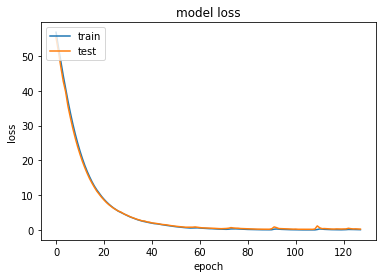

In [32]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# Saving the model.json

import json
model_json = model.to_json()
with open("Ar1_model2.json", "w") as json_file:
    json_file.write(model_json)

In [34]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('Ar1_model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/Ar_model_CNN_2.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 96.39%


In [53]:
print(cnnhistory.history['accuracy'][-1])

0.99380165


In [54]:
print(cnnhistory.history['val_accuracy'][-1])

0.9493975639343262


In [58]:
print(cnnhistory.history['loss'][-1])
print(cnnhistory.history['val_loss'][-1])

0.1454281720740736
0.30960080896515446


In [37]:

preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

415/415 [==============================] - 2s 4ms/step


In [38]:
preds1=preds.argmax(axis=1)

In [39]:
abc = preds1.astype(int).flatten()

In [40]:
predictions = (lb.inverse_transform((abc)))

In [51]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf.head(10)

,predictedvalues
0,angry
1,angry
2,angry
3,happy
4,surprised
5,angry
6,angry
7,happy
8,happy
9,happy


In [42]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [52]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf.head(10)

,actualvalues
0,angry
1,angry
2,angry
3,happy
4,surprised
5,angry
6,angry
7,happy
8,happy
9,happy


In [44]:
finaldf = actualdf.join(preddf)

In [45]:
finaldf

,actualvalues,predictedvalues
0,angry,angry
1,angry,angry
2,angry,angry
3,happy,happy
4,surprised,surprised
...,...,...
410,happy,angry
411,angry,angry
412,angry,angry
413,angry,angry


In [46]:
finaldf.shape

(415, 2)

In [47]:
(finaldf.actualvalues == finaldf.predictedvalues).value_counts()

True     400
False     15
dtype: int64

In [48]:
finaldf[finaldf.actualvalues != finaldf.predictedvalues]

,actualvalues,predictedvalues
99,angry,surprised
117,surprised,happy
125,angry,surprised
135,surprised,angry
143,happy,angry
172,angry,happy
193,happy,angry
203,happy,surprised
251,surprised,happy
257,happy,surprised


# Normal Nueral Nertwork

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='softmax')) # activation for binary classification

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_1 = Sequential()
model_1.add(Dense(X_train.shape[1],
                input_dim=X_train.shape[1],
                activation='relu',
                kernel_regularizer=regularizers.l1(0.01)))
model_1.add(Dense(3, activation='softmax'))

In [ ]:
model_1.summary()

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
result_1 = model_1.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=1000,
                    batch_size=None,
                    verbose=1) 

In [ ]:
train_loss = result.history['loss']
test_loss = result.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [ ]:
train_loss1 = result_1.history['loss']
test_loss1 = result_1.history['val_loss']
plt.plot(train_loss1, label='Training loss')
plt.plot(test_loss1, label='Testing loss')
plt.legend()

In [ ]:
print('Train Accuracy', result_1.history['loss'][-1])
print('Test Accuracy', result_1.history['val_loss'][-1])

In [ ]:
##########

In [ ]:
model_2 = Sequential()
model_2.add(Dense(X_train.shape[1],
                input_dim=X_train.shape[1],
                activation='relu'))
model_2.add(Dropout(0.8))
model_2.add(Dense(3, activation='softmax'))

In [ ]:
model_2.summary()

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
result_2 = model_2.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=450,
                    batch_size=None,
                    verbose=0) 

In [ ]:
print('Train loss', result_2.history['loss'][-1])
print('Test loss', result_2.history['val_loss'][-1])

In [ ]:
## plot loss function
train_loss = result_2.history['loss']
test_loss = result_2.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()